In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from ast import literal_eval

# Build graph of persons dependency based on coocurrencies

In [276]:
df_corpus = pd.read_csv('persons_wiki.csv', index_col=0, header = 0, names=['article_id','category', 'text','wiki_id', 'person'])
df_corpus.person = df_corpus.person.apply(literal_eval)
df_corpus = df_corpus.drop(columns = ['wiki_id'])
#df_corpus = pd.read_csv('persons_.csv', index_col=0, header = 0, names=['article_id','category', 'text', 'person'])
#df = pd.read_csv('persons_large.csv', index_col=None, header = 0, names=['article_id', 'text', 'person'])
df_corpus.head()

,category,text,person
article_id,,,
0,politics,"МОСКВА, 27 мая — РИА Новости. Депутат Госдумы ...","[Вячеслав Викторович Володин, Аршба Отари Ионо..."
1,politics,"МОСКВА, 26 мая - РИА Новости. ""Западным друзья...",[Сергей Викторович Лавров]
2,politics,"МОСКВА, 26 мая/ Радио Sputnik. Канцлер Германи...","[Владимир Андреевич Пучков, Дмитрий Анатольеви..."
3,politics,"МОСКВА, 26 мая - РИА Новости. У России есть пл...","[Кабус бен Саид, Николай Павлович Лавёров, Сер..."
4,politics,"МОСКВА, 26 мая - РИА Новости. В основе работы ...",[Вячеслав Викторович Володин]


In [162]:
df = df_corpus
df = df.explode('person')
df= df.merge(df,on='article_id', how='inner')
df.head()

,category_x,text_x,person_x,category_y,text_y,person_y
article_id,,,,,,
0,politics,"МОСКВА, 27 мая — РИА Новости. Депутат Госдумы ...",Вячеслав Викторович Володин,politics,"МОСКВА, 27 мая — РИА Новости. Депутат Госдумы ...",Вячеслав Викторович Володин
0,politics,"МОСКВА, 27 мая — РИА Новости. Депутат Госдумы ...",Вячеслав Викторович Володин,politics,"МОСКВА, 27 мая — РИА Новости. Депутат Госдумы ...",Аршба Отари Ионович
0,politics,"МОСКВА, 27 мая — РИА Новости. Депутат Госдумы ...",Вячеслав Викторович Володин,politics,"МОСКВА, 27 мая — РИА Новости. Депутат Госдумы ...",Кармазин Юрий Анатольевич
0,politics,"МОСКВА, 27 мая — РИА Новости. Депутат Госдумы ...",Аршба Отари Ионович,politics,"МОСКВА, 27 мая — РИА Новости. Депутат Госдумы ...",Вячеслав Викторович Володин
0,politics,"МОСКВА, 27 мая — РИА Новости. Депутат Госдумы ...",Аршба Отари Ионович,politics,"МОСКВА, 27 мая — РИА Новости. Депутат Госдумы ...",Аршба Отари Ионович


In [163]:
edges = df[['person_x', 'person_y']]
edges = edges[edges.person_x != edges.person_y]
edges

,person_x,person_y
article_id,,
0,Вячеслав Викторович Володин,Аршба Отари Ионович
0,Вячеслав Викторович Володин,Кармазин Юрий Анатольевич
0,Аршба Отари Ионович,Вячеслав Викторович Володин
0,Аршба Отари Ионович,Кармазин Юрий Анатольевич
0,Кармазин Юрий Анатольевич,Вячеслав Викторович Володин
...,...,...
249,Максим Леонардович Шевченко,Зуев Владимир Евсеевич
249,Максим Леонардович Шевченко,Голодец Ольга Юрьевна
249,Максим Леонардович Шевченко,Эвелина Ганская


In [164]:
edges['meets'] = edges.groupby(['person_x', 'person_y']).person_x.transform('count')
edges = edges.dropna()
edges = edges.drop_duplicates()
edges

,person_x,person_y,meets
article_id,,,
0,Вячеслав Викторович Володин,Аршба Отари Ионович,1.0
0,Вячеслав Викторович Володин,Кармазин Юрий Анатольевич,1.0
0,Аршба Отари Ионович,Вячеслав Викторович Володин,1.0
0,Аршба Отари Ионович,Кармазин Юрий Анатольевич,1.0
0,Кармазин Юрий Анатольевич,Вячеслав Викторович Володин,1.0
...,...,...,...
249,Максим Леонардович Шевченко,Зуев Владимир Евсеевич,1.0
249,Максим Леонардович Шевченко,Голодец Ольга Юрьевна,1.0
249,Максим Леонардович Шевченко,Эвелина Ганская,1.0


In [165]:
g = nx.from_pandas_edgelist(edges, source='person_x', target = 'person_y', edge_attr = 'meets')

In [166]:
g.number_of_nodes(), g.number_of_edges()

(384, 1280)

# Visualization

{'Александр Константинович Глазунов': Text(0.7310762178151902, -0.44593376302424736, 'Александр Константинович Глазунов'),
 'Александр Петрович Чуприян': Text(-0.0014281526052608285, 0.08564713302713241, 'Александр Петрович Чуприян'),
 'Анна': Text(0.27183850544073307, 0.3172947871863431, 'Анна'),
 'Анна Юрьевна Нетребко': Text(0.17404696704100056, 0.2862573358430409, 'Анна Юрьевна Нетребко'),
 'Аршба Отари Ионович': Text(-0.767820738597639, 0.8745707428568726, 'Аршба Отари Ионович'),
 'Владимир Владимирович Путин': Text(-0.011222330318635959, 0.16525087985171152, 'Владимир Владимирович Путин'),
 'Голодец Ольга Юрьевна': Text(0.4741138240518606, 0.42524915264861807, 'Голодец Ольга Юрьевна'),
 'Денис Николаевич Вороненков': Text(-1.0, 0.42868446085996104, 'Денис Николаевич Вороненков'),
 'Дмитрий Анатольевич Медведев': Text(-0.06215407505924373, 0.1487543429576431, 'Дмитрий Анатольевич Медведев'),
 'Дмитрий Олегович Рогозин': Text(-0.07873167609349782, 0.2702385685099413, 'Дмитрий Олего

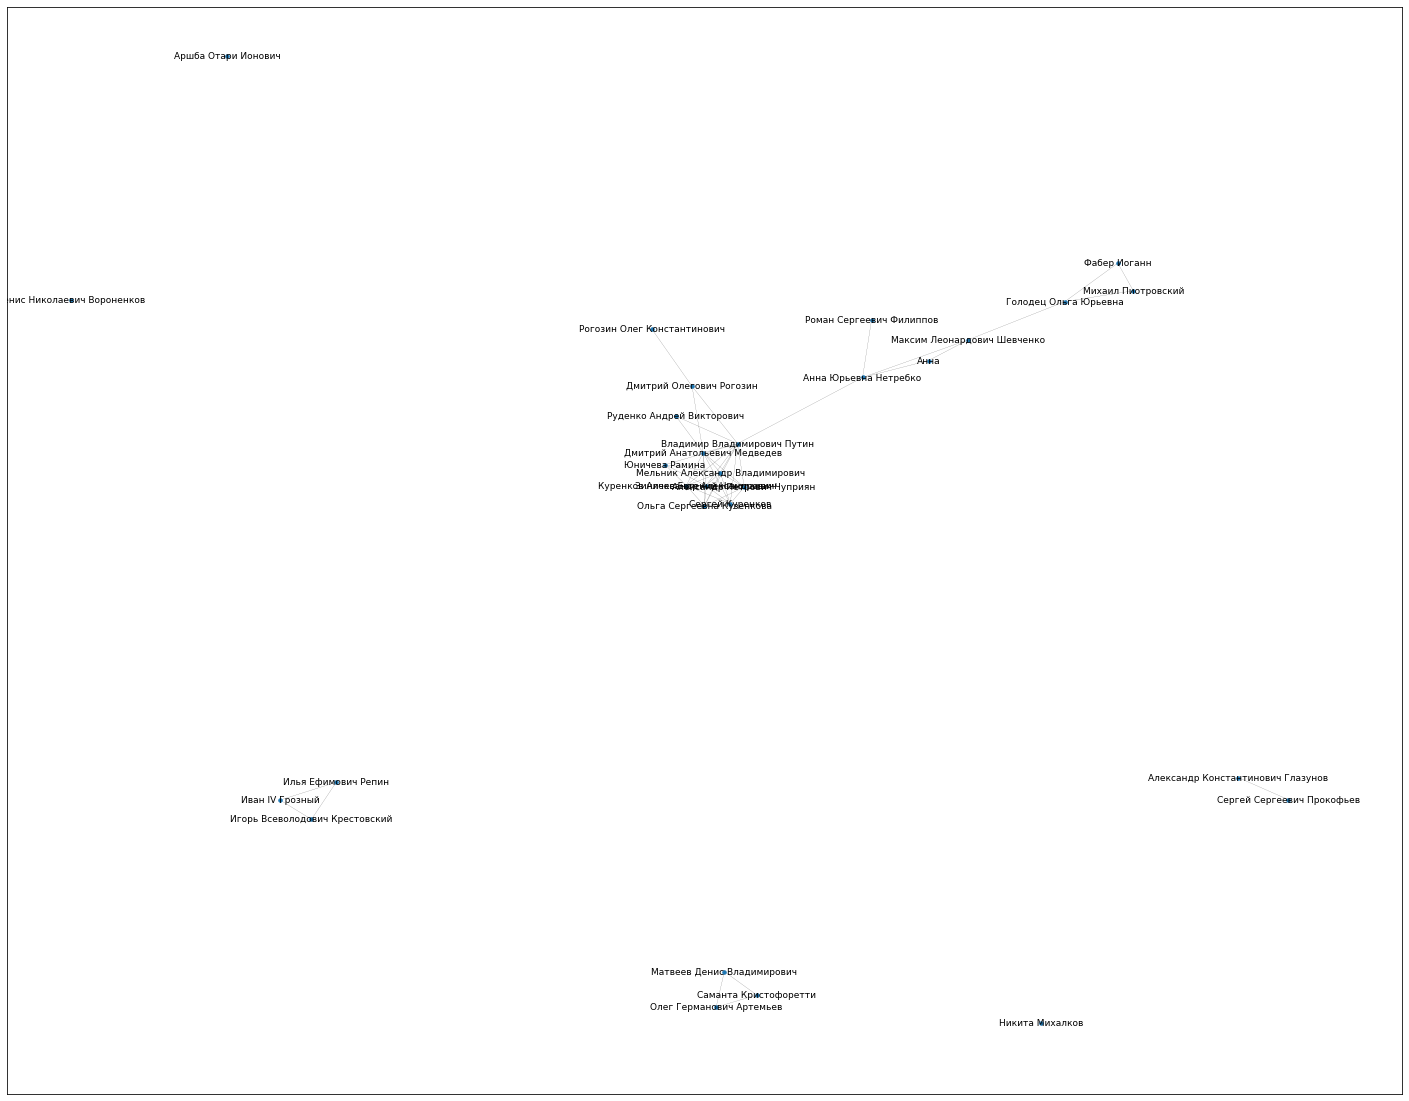

In [175]:
#edges_t = edges[edges.meets > edges.meets.quantile(0.01)] 
#G = nx.from_pandas_edgelist(edges, source='person_x', target = 'person_y', edge_attr = 'meets')
G = g.copy()
wdeg = G.degree(weight = 'meets')
to_remove = [n for n,d in wdeg if d <602 ]
G.remove_nodes_from(to_remove)

G = g.copy()
sens_scores = nx.pagerank(g, alpha=0.9, weight='meets')
sen_rank = sorted(sens_scores.items(), key=lambda x: x[1], reverse=True)
to_remove = [n for n,d in sen_rank[30:]]
G.remove_nodes_from(to_remove)
edge_all = [(u,v) for (u,v,d) in G.edges(data=True)]
pos=nx.spring_layout(G)
plt.figure(figsize=(25,20))
nx.draw_networkx_nodes(G,pos,node_size=12)                 # draw nodes
nx.draw_networkx_edges(G,pos,edgelist=edge_all,width=0.12) # draw edges
nx.draw_networkx_labels(G,pos, font_size=9)

average neighboring in text

In [176]:
np.mean(np.array([d for n,d in g.degree()])), np.median(np.array([d for n,d in g.degree()]))

(6.666666666666667, 5.0)

average meets number for each person

In [177]:
np.mean(np.array([d for n,d in g.degree(weight = 'meets')])), np.median(np.array([d for n,d in g.degree(weight = 'meets')]))

(7.302083333333333, 5.0)

In [178]:
np.sort(np.array([d for n,d in g.degree(weight = 'meets')]))[::-1][0:5]

array([89., 55., 53., 41., 37.])

In [179]:
nx.density(g)

0.017406440382941687

In [180]:
#S = [nx.diameter(G.subgraph(c).copy()) for c in nx.connected_components(g) if len(c)> 1]

nx.diameter(g.subgraph([c for c in sorted(nx.connected_components(g), key=len, reverse=True)][0]))

8

In [181]:
sens_scores = nx.pagerank(g, alpha=0.9, weight='meets')
sen_rank = sorted(sens_scores.items(), key=lambda x: x[1], reverse=True)
sen_rank[0:5]

[('Владимир Владимирович Путин', 0.023834471599109047),
 ('Дмитрий Анатольевич Медведев', 0.015678968338142196),
 ('Куренков Александр Александрович', 0.012853316306422922),
 ('Зиничев Евгений Николаевич', 0.00867459916386917),
 ('Мельник Александр Владимирович', 0.00867459916386917)]

In [182]:
sorted(nx.degree_centrality(g).items(), key=lambda x: x[1], reverse=True)[0:10]

[('Владимир Владимирович Путин', 0.1174934725848564),
 ('Роман Сергеевич Филиппов', 0.10704960835509139),
 ('Дмитрий Анатольевич Медведев', 0.08093994778067885),
 ('Анна Юрьевна Нетребко', 0.0783289817232376),
 ('Сергей Сергеевич Прокофьев', 0.05483028720626632),
 ('Ольга Игоревна Кабо', 0.05483028720626632),
 ('Анастасия Васильевна Макеева', 0.05483028720626632),
 ('Имам Шамиль', 0.05483028720626632),
 ('Дмитрий Владимирович Соломин', 0.05483028720626632),
 ('Сергей Безруков', 0.05483028720626632)]

In [183]:
sorted(nx.closeness_centrality(g, distance='meets').items(), key=lambda x: x[1], reverse=True)[0:10]

[('Анна Юрьевна Нетребко', 0.1955367906256606),
 ('Владимир Владимирович Путин', 0.19468477846607166),
 ('Пётр Ильич Чайковский', 0.17660140971527055),
 ('Сергей Васильевич Рахманинов', 0.16734141070398295),
 ('Кремлевский Александр Магистрианович', 0.16734141070398295),
 ('Клод Дебюсси', 0.16734141070398295),
 ('Максим Леонардович Шевченко', 0.15406950571711536),
 ('Роман Сергеевич Филиппов', 0.15406950571711536),
 ('Дмитрий Олегович Рогозин', 0.15120188378329424),
 ('Валентина Ивановна Матвиенко', 0.1494319620667674)]

# Complementary recommendation algorithm

Препроцессинг:

*   Удаление 1 предложения с информацией о дате и месте события
*   Удаление предложения с информацией, не относяящейся к новости (например "только отборные цитаты в нашем телеграм-канале")
*   Приведение к нижнему регистру
*   Удаление знаков пунктуации
*   Токенизация, удаление стоп-слов и лемматизация
*   Удаление слов длины меньшей 3 символов

Алгоритм рекомендаций:
1. Person-wise dependency graph
2. Page rank scoring of persons
3. New feature: importance - sum of person pr scores included in article
4. Select TopK of similar articles using tfidf
5. Sort by importance


In [ ]:
!pip install pymorphy2

In [ ]:
!pip install stop_words

In [ ]:
!pip install plsa

In [18]:
!pip install -q pyLDAvis

     |████████████████████████████████| 1.7 MB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done


In [278]:
import json
import pandas as pd
import copy 
import numpy as np
import re
import string
import pymorphy2 
import stop_words
import collections
import matplotlib.pyplot as plt
import gc
import plsa
from plsa.preprocessors import *
from plsa import Corpus, Pipeline, Visualize
from plsa.pipeline import DEFAULT_PIPELINE
from plsa.algorithms import PLSA
from gensim.corpora import Dictionary
from gensim.models import Word2Vec
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
#import pyLDAvis.gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

def lower_case(text):
    return str(text).lower()

def data_preprocessing(df_):
    #delete first sentence
    for i in df_.index:
        text = df_.at[i, 'text'] 
        tmp_split = text.split('Радио Sputnik')
        if(len(tmp_split) >= 2):
            df_.at[i, 'text']  = tmp_split[1]
        tmp_split = text.split('РИА Новости')
        if(len(tmp_split) >= 2):
            df_.at[i, 'text']  = tmp_split[1]

    df_['text'] = df_['text'].apply(lower_case)

    #delete advertising
    for i in df_.index:
        df_.at[i, 'text'] = df_.at[i, 'text'].replace('только отборные цитаты в нашем телеграм-канале', '')
        df_.at[i, 'text'] = df_.at[i, 'text'].replace('sputnik', '')
        df_.at[i, 'text'] = df_.at[i, 'text'].replace('коротко и по делу', '')

    #delete punctuation
    regex_punct = re.compile('[%s]' % re.escape(string.punctuation))
    for i in df_.index:
        df_.at[i, 'text'] = regex_punct.sub('', df_.at[i, 'text'])
        df_.at[i, 'text'] = df_.at[i, 'text'].replace('—', ' ')
    
    #tokenization + lemmatization
    morph = pymorphy2.MorphAnalyzer()
    normal_tokens = []
    stopwords = stop_words.get_stop_words('ru')
    for text in df_['text']:
        tmp_tokens = text.split()
        tmp_tokens_without_stopwords = []
        for token in tmp_tokens:
            if token not in stopwords:
                normal_token = morph.parse(token)[0].normal_form
                if len(normal_token) > 1:
                    tmp_tokens_without_stopwords.append(normal_token)
        normal_tokens.append(tmp_tokens_without_stopwords)
    df_['source_text'] = df_.text
    df_.text = np.array(normal_tokens)

    return df_

In [279]:
df_corpus = pd.read_csv('persons_wiki.csv', index_col=0, header = 0, names=['article_id','category', 'text','wiki_id', 'person'])
df_corpus.person = df_corpus.person.apply(literal_eval)
df_corpus = df_corpus.drop(columns = ['wiki_id'])
#df_corpus = pd.read_csv('persons_.csv', index_col=0, header = 0, names=['article_id','category', 'text', 'person'])
#df = pd.read_csv('persons_large.csv', index_col=None, header = 0, names=['article_id', 'text', 'person'])
df_corpus.head()

,category,text,person
article_id,,,
0,politics,"МОСКВА, 27 мая — РИА Новости. Депутат Госдумы ...","[Вячеслав Викторович Володин, Аршба Отари Ионо..."
1,politics,"МОСКВА, 26 мая - РИА Новости. ""Западным друзья...",[Сергей Викторович Лавров]
2,politics,"МОСКВА, 26 мая/ Радио Sputnik. Канцлер Германи...","[Владимир Андреевич Пучков, Дмитрий Анатольеви..."
3,politics,"МОСКВА, 26 мая - РИА Новости. У России есть пл...","[Кабус бен Саид, Николай Павлович Лавёров, Сер..."
4,politics,"МОСКВА, 26 мая - РИА Новости. В основе работы ...",[Вячеслав Викторович Володин]


In [280]:
df_corpus = data_preprocessing(df_corpus)
df_corpus.head()

,category,text,person,source_text
article_id,,,,
0,politics,"[депутат, госдума, обязать, присутствовать, пл...","[Вячеслав Викторович Володин, Аршба Отари Ионо...",депутат госдумы обязан присутствовать во врем...
1,politics,"[западный, друг, россия, избавляться, параноид...",[Сергей Викторович Лавров],западным друзьям россии пора избавляться от п...
2,politics,"[канцлер, германия, олафа, шольц, поддерживать...","[Владимир Андреевич Пучков, Дмитрий Анатольеви...",канцлер германии олаф шольц поддерживает влад...
3,politics,"[россия, план, развивать, сотрудничество, оман...","[Кабус бен Саид, Николай Павлович Лавёров, Сер...",у россии есть планы развивать сотрудничество ...
4,politics,"[основа, работа, госдума, должный, самоорганиз...",[Вячеслав Викторович Володин],в основе работы госдумы должна быть самоорган...


In [281]:
sens_scores = nx.pagerank(g, alpha=0.9, weight='meets')
sen_rank = sorted(sens_scores.items(), key=lambda x: x[1], reverse=True)

In [282]:
pr_scores = dict(sen_rank)

In [283]:
persons_list = df_corpus.person
importance = []
for persons in persons_list:
    importance.append(sum([pr_scores[person] for person in persons if person in pr_scores]))

df_corpus['importance'] = importance

In [284]:
df_corpus.sort_values(by=['importance'], ascending = False).head()

,category,text,person,source_text,importance
article_id,,,,,
30,politics,"[совет, федерация, поддержать, кандидатура, ал...","[Ольга Сергеевна Кузенкова, Зиничев Евгений Ни...",совет федерации поддержал кандидатуру алексан...,0.085808
27,politics,"[владимир, путин, подписать, указ, назначение,...","[Ольга Сергеевна Кузенкова, Зиничев Евгений Ни...",владимир путин подписал указ о назначении але...,0.079553
41,politics,"[профильный, комитет, совет, федерация, поддер...","[Зиничев Евгений Николаевич, Дмитрий Анатольев...",профильные комитеты совета федерации поддержа...,0.075382
167,culture,"[московский, кинотеатр, художественный, пройти...","[Новиков Иван, Роман Сергеевич Филиппов, Крист...",в московском кинотеатре художественный прошла...,0.064990
22,politics,"[президент, россия, владимир, путин, представи...","[Александр Гамильтон, Мельник Александр Владим...",президент россии владимир путин представил но...,0.062030


In [285]:
train_data = []
for text in df_corpus.text.values:
    train_data.append([word for word in text])

In [286]:
min_count  = 2
model_word2vec_plsa = Word2Vec(
        train_data,
        size=150,
        window=4,
        min_count=min_count,
        workers=10,
        iter=10)

In [287]:
text = df_corpus.text.values
text = [[k for k in tex if tex.count(k) >= min_count] for tex in text]
df_corpus.text = text

In [288]:
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

n = df_corpus.text.values.shape[0]
similarity_matrix = np.zeros((n, n))
text = df_corpus.text.values

for i in tqdm(range(n)):
    for j in range(i + 1, n):
        
        similarity_matrix[i][j] = 1 / (1 + model_word2vec_plsa.wmdistance(text[i], text[j]))
        similarity_matrix[j][i] =  similarity_matrix[i][j]



100%|██████████| 250/250 [01:30<00:00,  2.75it/s]


In [289]:
topk=np.flip(np.argsort(similarity_matrix), axis=1)[:, 1:10]
topk_values = []
for i in range(topk.shape[0]):
    topk_values.append(np.take(similarity_matrix[i], topk[i]))
topk_values = np.array(topk_values)

In [290]:
def get_recommendations(article_id):
    result = df_corpus.loc[topk[article_id]]
    result = result.sort_values(by=['importance'], ascending=False)
    return result

In [291]:
source_id  = 0 
recs = get_recommendations(source_id)
rec_ids = recs.index.values
source_text = df_corpus.loc[[source_id]].source_text.values
rec_texts =  df_corpus.loc[rec_ids].source_text.values
source_text

array([' депутат госдумы обязан присутствовать во время пленарных заседаний палаты за прогул у парламентария могут вычесть среднедневной заработок комиссия гд по регламенту ведет специальный учет по количеству присутствующих и отсутствующих на каждом заседании рассказала '],
      dtype=object)

In [292]:
rec_texts[0]

' президент россии владимир путин представил нового главу мчс александра куренкова рассказав что он начинал свой профессиональный путь рядовым сотрудником в органах госбезопасности не является карьеристом в плохом смысле слова а наоборот служака умеющий досконально погружаться в свое делодобрый день уважаемые товарищи сегодня представляю вам нового министра по чрезвычайным ситуациям александра вячеславовича куренкова александр вячеславович начал свою деятельность рядовым сотрудником в органах государственной безопасности затем длительное время также работал в федеральной службе охраны последнее место работы  заместитель директора федеральной службы войск национальной гвардии  сказал путин в центре управления в кризисных ситуациях мчспрезидент отметил что теперь куренков поднимется на еще одну ступеньку в своей профессиональной карьерено александр вячеславович не карьерист в плохом смысле слова а наоборот он служака знает то дело за которое берется досконально умеет погружаться умеет бу

In [293]:
rec_texts[1]

' в ближайших планах разговора президента рф владимира путина с президентом сербии александром вучичем пока нет но при необходимости он может состояться заявил пресссекретарь главы российского государства дмитрий песковпрезидент сербии александр вучич ранее заявил в эфире tv pink что надеется на переговоры 2426 мая с российским лидером владимиром путиным о поставках газа по его словам белград заполнит объемы в хранилищах в венгрии в ожидании поставок из рфпока в ближайшие дни нет в графике разговора но это не значит что очень оперативно такой разговор не может быть в графике вы знаете что контакты с белградом для нас приоритетные они союзнические дружеские поэтому при необходимости они будут проведены  сказал песков отвечая на вопрос есть ли у путина в графике телефонный разговор с вучичем'

In [294]:
source_id  = 140 
recs = get_recommendations(source_id)
rec_ids = recs.index.values
source_text = df_corpus.loc[[source_id]].source_text.values
rec_texts =  df_corpus.loc[rec_ids].source_text.values
source_text

array([' александр скворцов на счету которого три космических полета уходит из российского отряда космонавтов сообщили в пятницу в роскосмосеалександр скворцов завершает свою деятельность в отряде космонавтов роскосмоса\u200d  говорится в сообщении госкорпорации в telegramв роскосмосе напомнили что скворцов совершил три космических полёта общей продолжительностью 546 суток и два раза работал в открытом космосеза время работы на международной космической станции космонавт провёл десятки экспериментов из разных областей науки скворцов работал с российскими и иностранными грузовыми кораблями проводил обслуживание бортовых систем мкс фото и видеосъёмкуименно скворцов в августесентябре 2019 года стал первым кто в космосе поработал оператором антропоморфного робота fedor вместе с другим космонавтом алексеем овчининым они включили робота и дали ему поработать руками с отверткой ключами и состыковать электрические соединители а также включать дрель и протирать руки полотенцем кроме того космон

In [295]:
rec_texts[0]

' капсула космического корабля crew dragon с экипажем из четырех человек приводнилась в атлантическом океане вернувшись с международной космической станции мкс наса ведет прямую трансляциюкапсула коснулась поверхности океана в районе побережья флориды в 0743 мск в пятницу в ней на землю вернулись астронавты наса том маршберн раджа чари и кайла бэррон а также немецкий астронавт маттиас маурер они находились на мкс в составе третьей рабочей миссии корабля crew dragon crew3 с ноября прошлого года корабль с астронавтами покинул орбитальную станцию в четверг его возвращение заняло около сутоквскоре после приводнения специалисты компании spacex которой принадлежит космический корабль приступили к извлечению капсулы и доставке экипажа на берегпосле возвращения crew3 на мкс остаются россияне олег артемьев командир станции сергей корсаков и денис матвеев американцы челл линдгрен боб хайнс и джессика уоткинс итальянка саманта кристофоретти'